In [1]:
#import the packages
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [46]:
wine = pd.read_csv('wine-quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
print("Shape of our datasets of Red-Wine:{s}".format(s = wine.shape))
print("Column headers/names: {s}".format(s = list(wine)))

Shape of our datasets of Red-Wine:(4898, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [48]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [49]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [50]:
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [51]:

wine.quality.value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

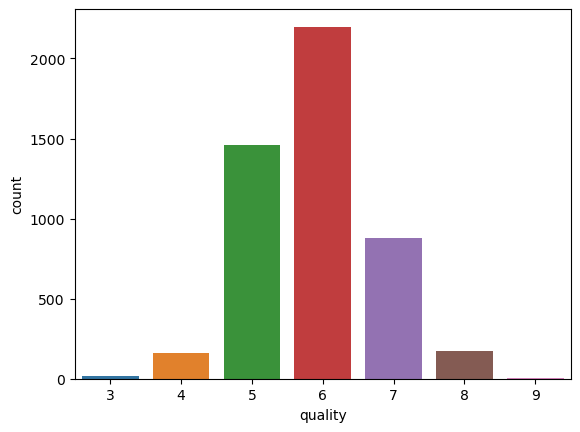

In [52]:
sns.countplot(x='quality', data=wine)

In [53]:
wine['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [54]:
wine['sulphates'].describe()

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

In [55]:
wine['citric acid'].describe()

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [56]:
wine['fixed acidity'].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64

In [57]:
wine['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

In [58]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [60]:
dataset_out = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]

dataset_out.shape

(3858, 12)

In [61]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [62]:
correlations = dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.062998
volatile acidity       -0.134524
citric acid             0.017231
residual sugar         -0.123021
chlorides              -0.283753
free sulfur dioxide    -0.002794
total sulfur dioxide   -0.178713
density                -0.305154
pH                      0.077708
sulphates               0.035317
alcohol                 0.417171
Name: quality, dtype: float64


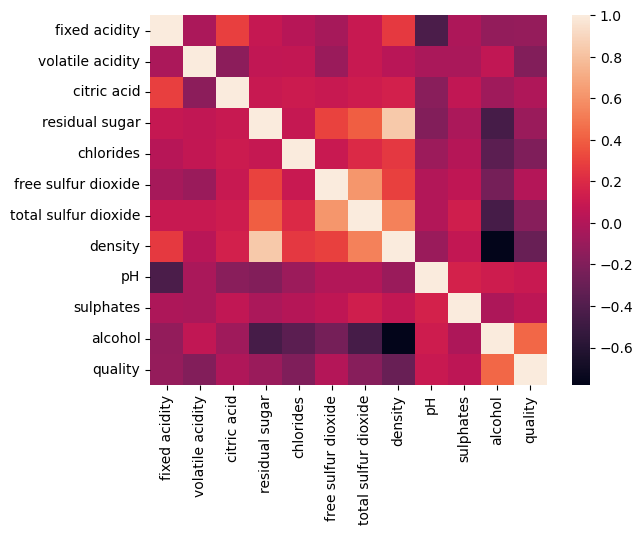

In [63]:
sns.heatmap(wine.corr())
plt.show()

In [64]:
#impact of various factor on quality
correlations.sort_values(ascending=False)

alcohol                 0.417171
pH                      0.077708
sulphates               0.035317
citric acid             0.017231
free sulfur dioxide    -0.002794
fixed acidity          -0.062998
residual sugar         -0.123021
volatile acidity       -0.134524
total sulfur dioxide   -0.178713
chlorides              -0.283753
density                -0.305154
Name: quality, dtype: float64

In [65]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [66]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = dataset_out[features]
y = dataset_out['quality']

['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'alcohol']


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)
# x_train.shape

In [74]:
# x_train.shape
# x_test.shape
# y_train.shape
y_test.shape

(1158,)

In [75]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [76]:
regressor.intercept_


120.85728974187418

In [77]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 8.57770655e-02, -2.13735648e+00,  6.49397850e-02, -3.72762408e+00,
        1.31864301e-03, -1.20224277e+02,  6.81670832e-01,  1.79299677e-01])

In [78]:
train_pred = regressor.predict(x_train)
train_pred

array([5.42747145, 5.77946946, 5.62563134, ..., 6.10839591, 5.52262442,
       5.25092177])

In [79]:
test_pred = regressor.predict(x_test)
test_pred

array([6.1994191 , 5.83772356, 5.9744765 , ..., 5.82939907, 6.24998995,
       5.6998003 ])

In [80]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.656639986706651

In [81]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.6668635055846711

In [82]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., ..., 6., 6., 6.])

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:',rmse)


Mean Absolute Error: 0.5407604553589015
Mean Squared Error: 0.44470693508067666
Root Mean Squared Error: 0.6668635055846711


In [84]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred) 

0.22039532122464334

In [85]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
fixed acidity,0.085777
volatile acidity,-2.137356
residual sugar,0.064940
chlorides,-3.727624
total sulfur dioxide,0.001319
density,-120.224277
pH,0.681671
alcohol,0.179300
